#Mobile Price Classification

This project will be focused on the kaggle dataset: [Mobile Price Classification](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification)

The goal of this competition is to classify mobile phone prices within a price range indicating how high the price is. We will do this using a supervised machine learning model.



In this scenario, our model would help a business owner accurately estimate the prices of mobile phones his company creates. Additionally, we will find out the relationship between features of a mobile phone (RAM, Internal Memory, etc) and its selling price.

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from scipy.stats import chi2_contingency, f_oneway
from google.colab import userdata
import os

## Data Source

The data for this competition is available publicly from the Kaggle competition Mobile Price Classification as mentioned above.

[Data](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification/data)

To import the data to our notebook we can run the code below after creating a Kaggle API token and setting our environment variables accordingly.

In [99]:
!pip install -q kaggle;

In [100]:
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [101]:
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

Dataset URL: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification
License(s): unknown
  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 67.7MB/s]


In [102]:
%%capture
!unzip "mobile-price-classification.zip"

## Data

Below is the description of each variable taken from Kaggle

<div style="text-align:center;border-radius:60px 100px; padding:10px">


|       | **Attribute** | **Information** |
| :---  |     :---      |       :---      |      
| **1** | battery_power | Total energy a battery can store in one time measured in (mAh) |                
| **2** | blue | Has bluetooth or not |                        
| **3** | clock_speed | Speed at which microprocessor executes instructions |
| **4** | dual_sim | Has dual sim support or not |
| **5** | fc | Front camera (Megapixels) |                     
| **6** | four_g | Has 4G or not |
| **7** | int_memory | Internal memory in (Gigabytes) |              
| **8** | m_dep | Mobile depth in (Cm)  |                      
| **9** | mobile_wt |  Weight of mobile phone |
| **10** | pc | Primary camera (Megapixels) |
| **11** | px_height | Pixel resolution height |                      
| **12** | px_width | Pixel resolution width |
| **13** | ram | Random access memory in (Megabytes)  |              
| **14** | sc_h | Screen height of mobile in (Cm)  |                      
| **15** | sc_w | Screen width of mobile in (Cm) |
| **16** | talk_time | Longest time that a single battery charge will last when you are constantly talking on the phone |
| **17** | three_g | Has 3G or not |                      
| **18** | touch_screen | Has touch screen or not |
| **19** | wifi | Has wifi or not |              
| **20** | n_cores | Number of cores of processor |                       
| **21** | **price_range** | This is the Target variable with value of **0: (Low Cost**), **1: (Medium Cost**), **2: (High Cost**), and **3: (Very High Cost**) |

We will import our data into a dataframe and look at the head of the data.

In [103]:
df = pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


The data has 20 features, not including the target variable (price range).

In [104]:
len(df.columns) - 1

20

As seen below, the training set has 2000 rows. Additionally, the test.csv file has 1000 rows used for our submission so it isn't relevant at this point. When training our model we will create train and test sets from the train.csv dataset.

In [105]:
df_train = df
df_submission = pd.read_csv('test.csv')

In [106]:
print('rows in train.csv: ' + str(len(df_train)), '\nrows in test.csv: ' + str(len(df_submission)))
print('size of train.csv: ' + str(df_train.size))

rows in train.csv: 2000 
rows in test.csv: 1000
size of train.csv: 42000


As seen below, all features are either float or int type and there are no null or missing values in the dataset.

In [107]:
print("Info")
print(df.info())

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  tou

However, just because all features are float or int does not mean they are all numerical. By plotting them we can actually see we have 8 classification variables and 13 numerical variables.

* Categorical variables: n_cores , price_range, blue, dual_sim, four_g, three_g, touch_screen, wifi
* Numeric variables: battery_power, clock_speed, fc, int_memory, m_dep, mobile_wt, pc, px_height, px_width, ram, talk_time, sc_h, sc_w

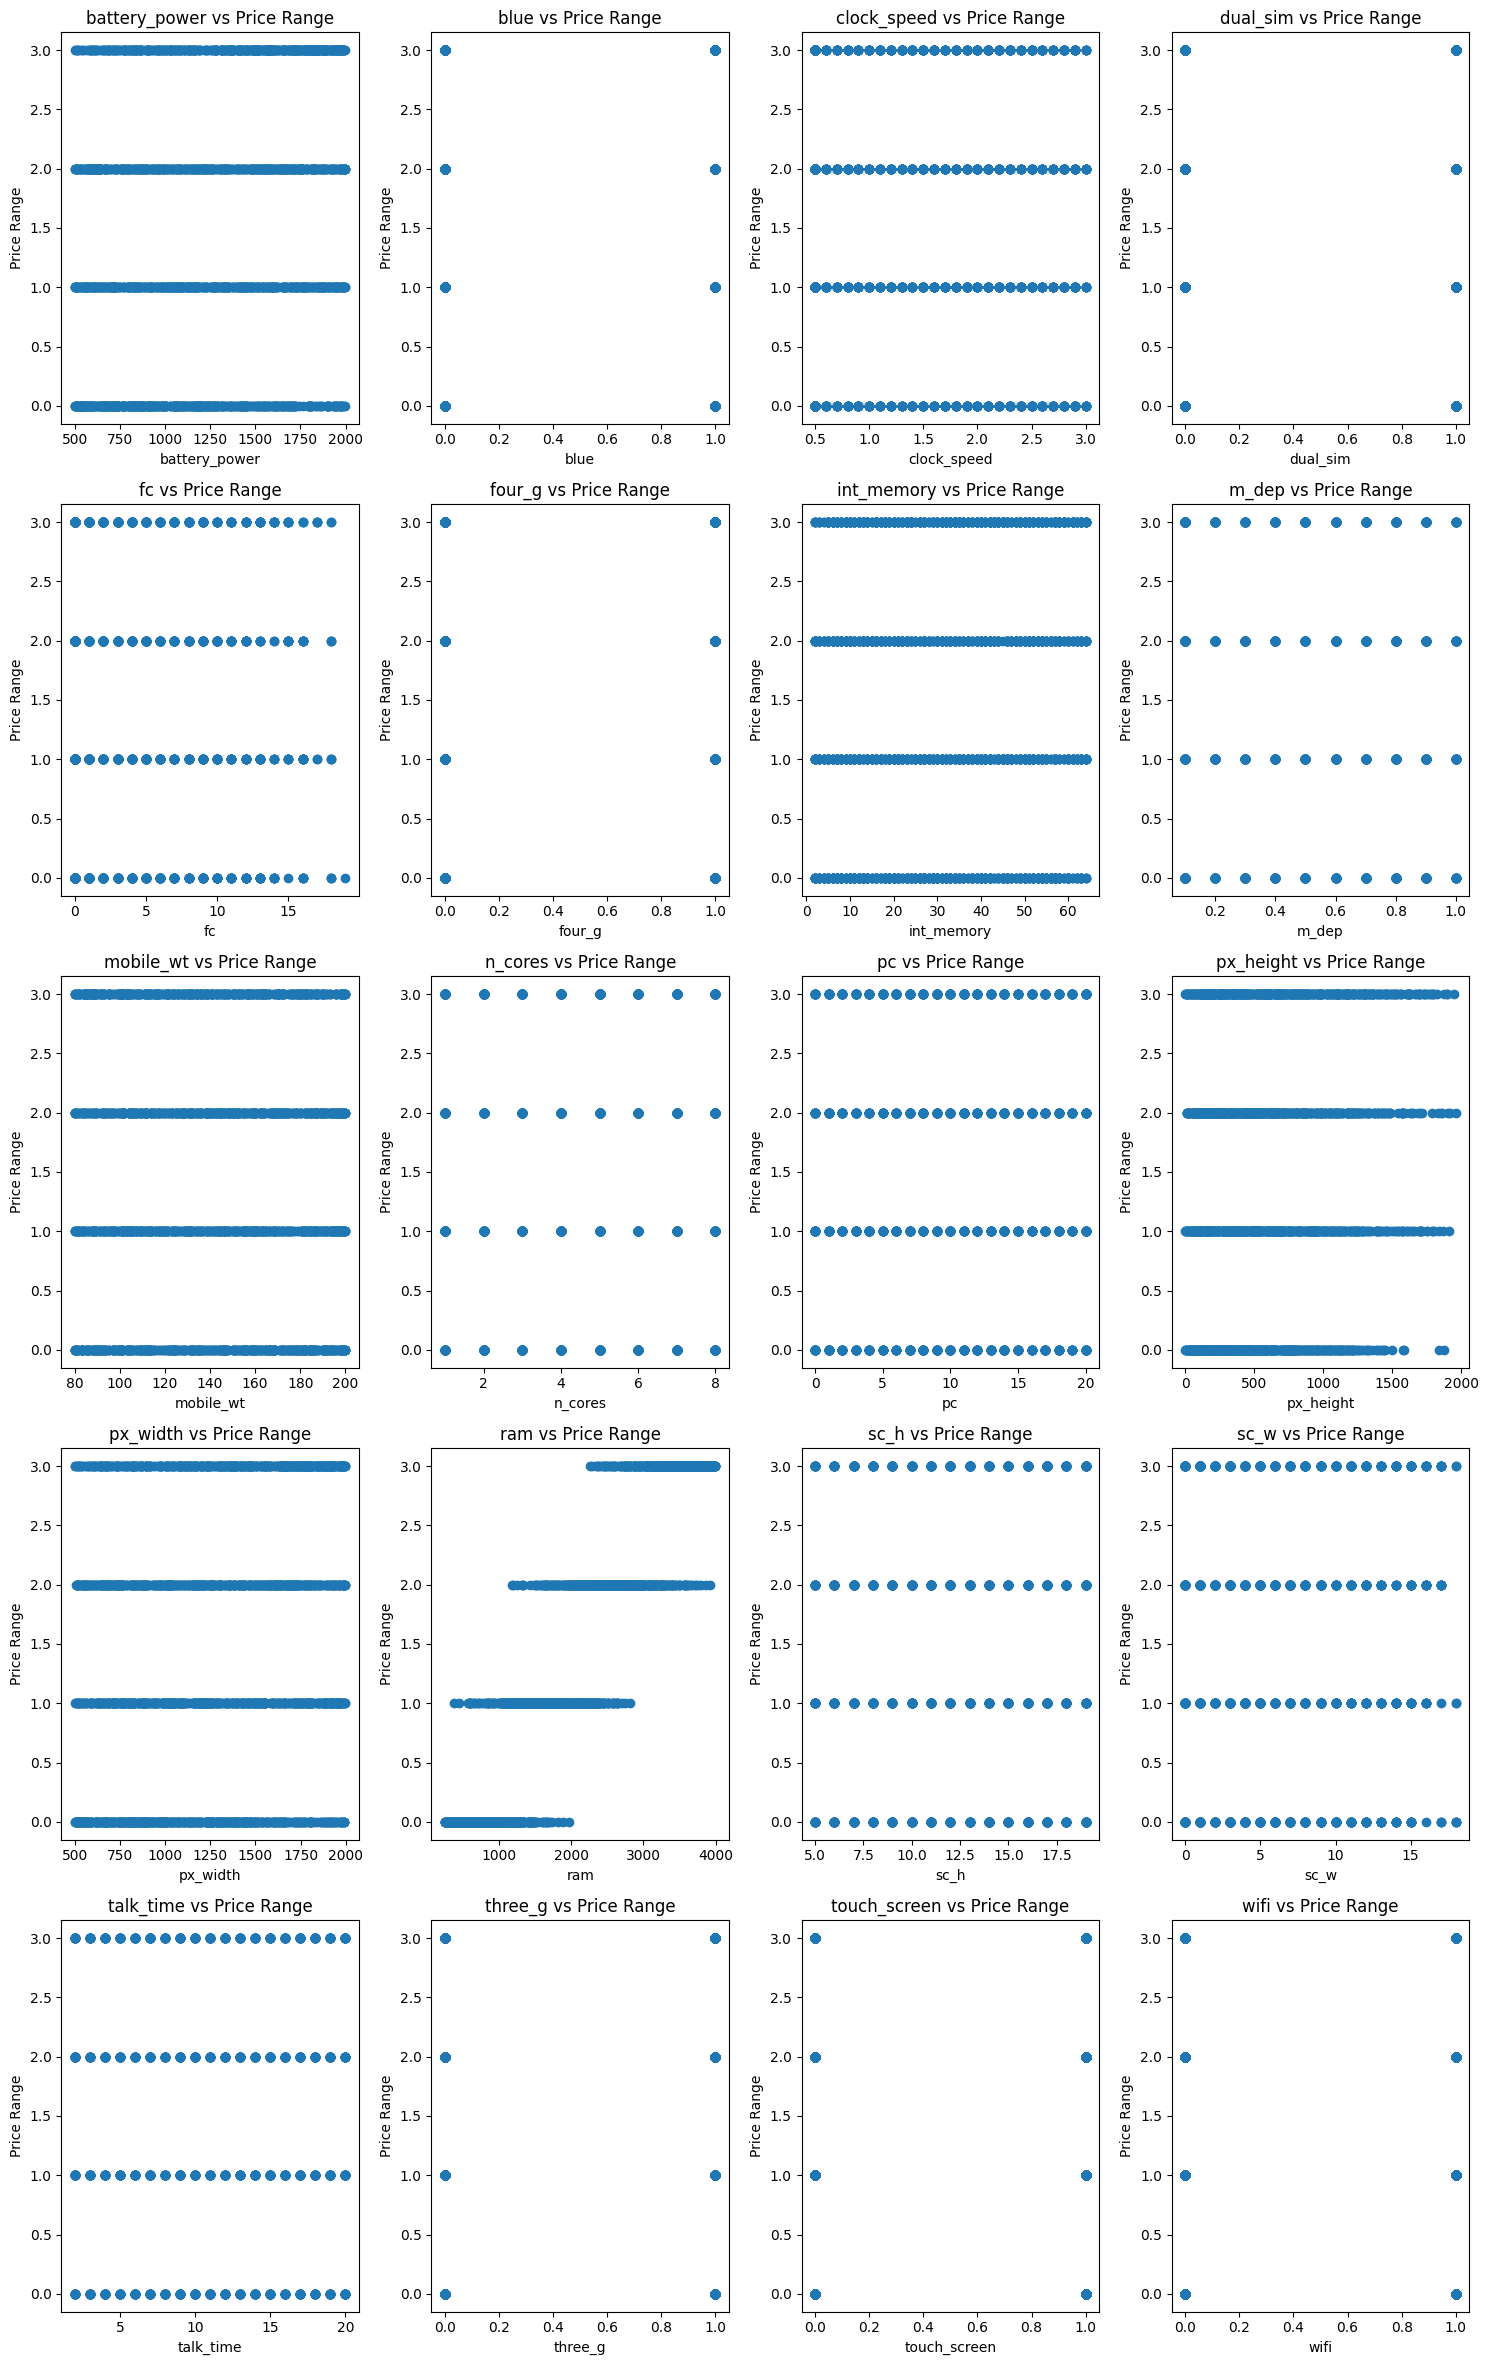

In [108]:
#create a grid of scatter plots for each feature vs price range
num_features = len(df.columns[:-1])
cols = 4
rows = 5
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

axes = axes.flatten()
for i, column in enumerate(df.columns[:-1]):
    axes[i].scatter(df[column], df.iloc[:, -1])
    axes[i].set_title(f"{column} vs Price Range")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Price Range")

for j in range(num_features, len(axes)):
    axes[j].axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Data Cleaning

Now lets begin cleaning the data so it is usable when implementing a machine learning model

Let's focus on finding out if our categorical features are usable as is. If each of them are either 1 or 0 for values, they are all set, but for ranges we would have to use a technique like one-hot encoding and create additional features for points in the range.

In [109]:
df.apply(lambda x: len(x.unique()))

,0
battery_power,1094
blue,2
clock_speed,26
dual_sim,2
fc,20
four_g,2
int_memory,63
m_dep,10
mobile_wt,121
n_cores,8


We can see the cateogrical variables with only two possible values are:
* blue, dual_sim, four_g, three_g, touch_screen, wifi

Meanwhile the categorical features with more than two values are:
* n_cores, price_range

First let's analyze n_cores to see if it should be treated as a numerical or cateogrical feature. We'll start by seeing if there is a linear relationship between n_cores and price_range.

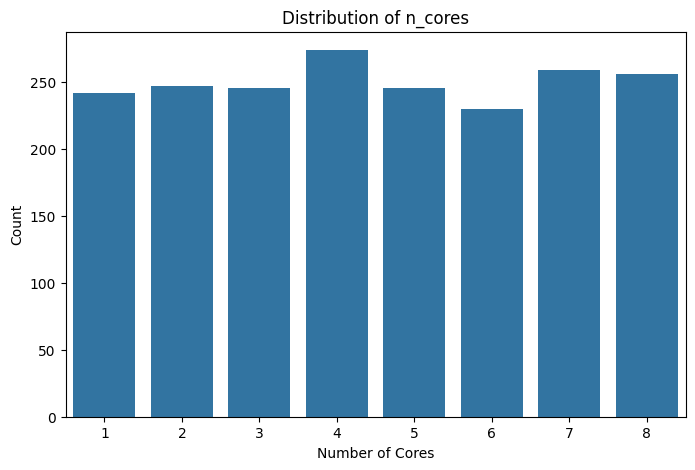

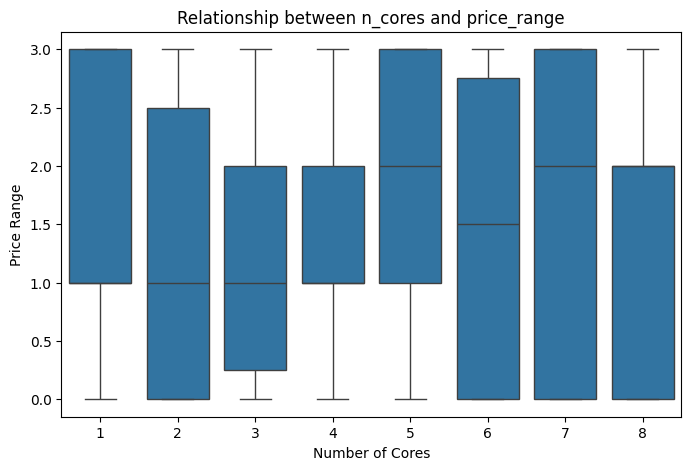

In [110]:
n_cores_distribution = df['n_cores'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=n_cores_distribution.index, y=n_cores_distribution.values)
plt.title("Distribution of n_cores")
plt.xlabel("Number of Cores")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='n_cores', y='price_range', data=df)
plt.title("Relationship between n_cores and price_range")
plt.xlabel("Number of Cores")
plt.ylabel("Price Range")
plt.show()

Based on the box plots, it's clear that there is not a linear relationship between n_cores and price range, and as number of cores increases, we shouldn't expect price_range to increase as well. Additionally, we have a pretty even distribution of frequency for each n_cores value.

In [111]:
df['n_cores'].corr(df['price_range'])

0.004399274799457278

The correlation between them is very weak. Instead of treating the n_cores as a numerical feature, we will split it into dummy variables, that way we can see if particular values of n_cores are more predictive.

In [112]:
df_dummies = pd.get_dummies(df, columns=['n_cores'], prefix='core')

We'll also change the other binary features to type bool for consistency and readability.

In [113]:
binary_columns = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
df_dummies[binary_columns] = df_dummies[binary_columns].astype(bool)

In [114]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   bool   
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   bool   
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   bool   
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   pc             2000 non-null   int64  
 10  px_height      2000 non-null   int64  
 11  px_width       2000 non-null   int64  
 12  ram            2000 non-null   int64  
 13  sc_h           2000 non-null   int64  
 14  sc_w           2000 non-null   int64  
 15  talk_time      2000 non-null   int64  
 16  three_g        2000 non-null   bool   
 17  touch_screen   2000 non-null   bool   
 18  wifi    

## Exploratory Data Analysis

Let's start the EDA process with gathering descriptive statistics on each of the features.

In [115]:
df = df_dummies

In [116]:
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


Now lets create a correlation matrix for the data and we can see any multicollinearity and correlation with the target variable.

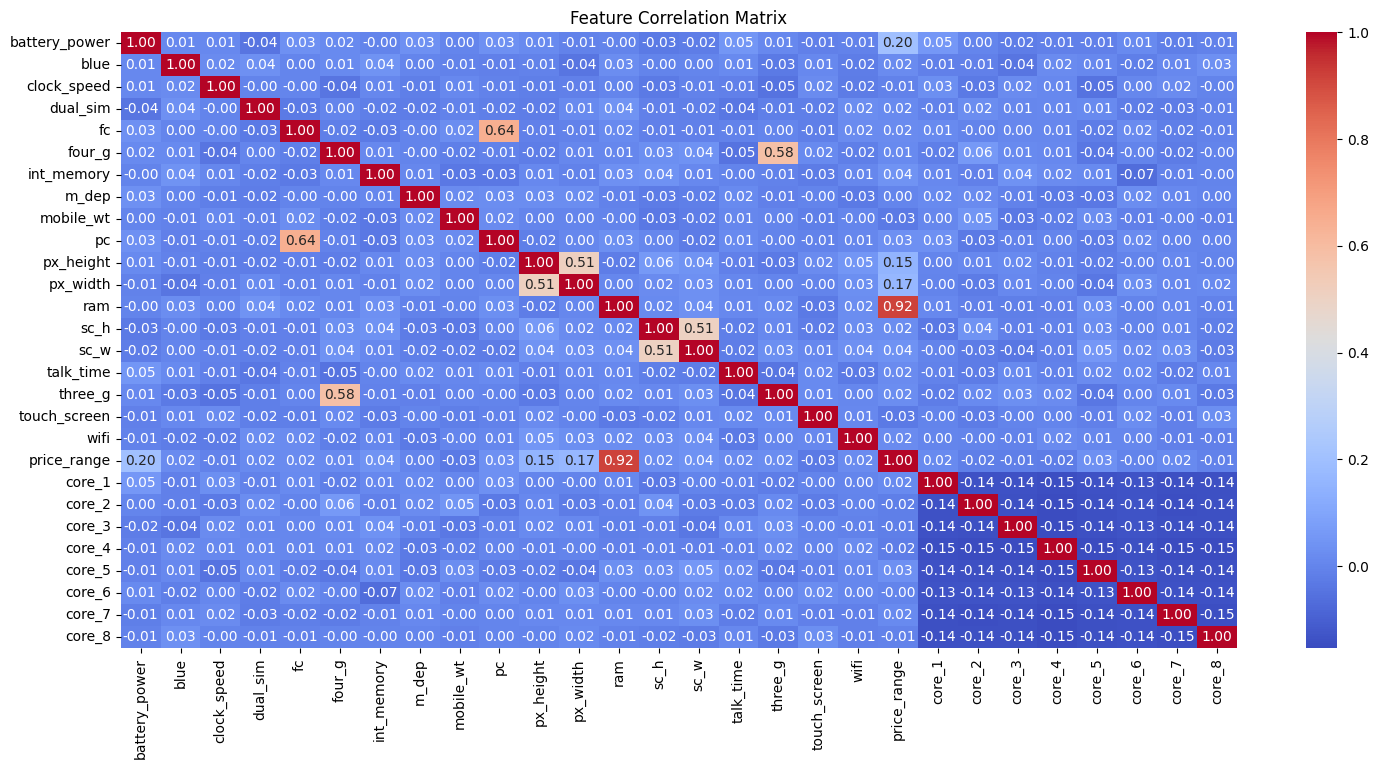

In [117]:
correlation_matrix = df.corr()

plt.figure(figsize=(18, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Matrix")
plt.show()

Analysis of correlation matrix:

The correlation shows ram should be a strong predictor of price_range due to its pearson correlation coefficient of 0.92. Additionally, there may be multicollinearity between variables like px_width and px_height, sc_h and sc_w,pc and fc, and three_g and four_g since they all have coefficients above .5.

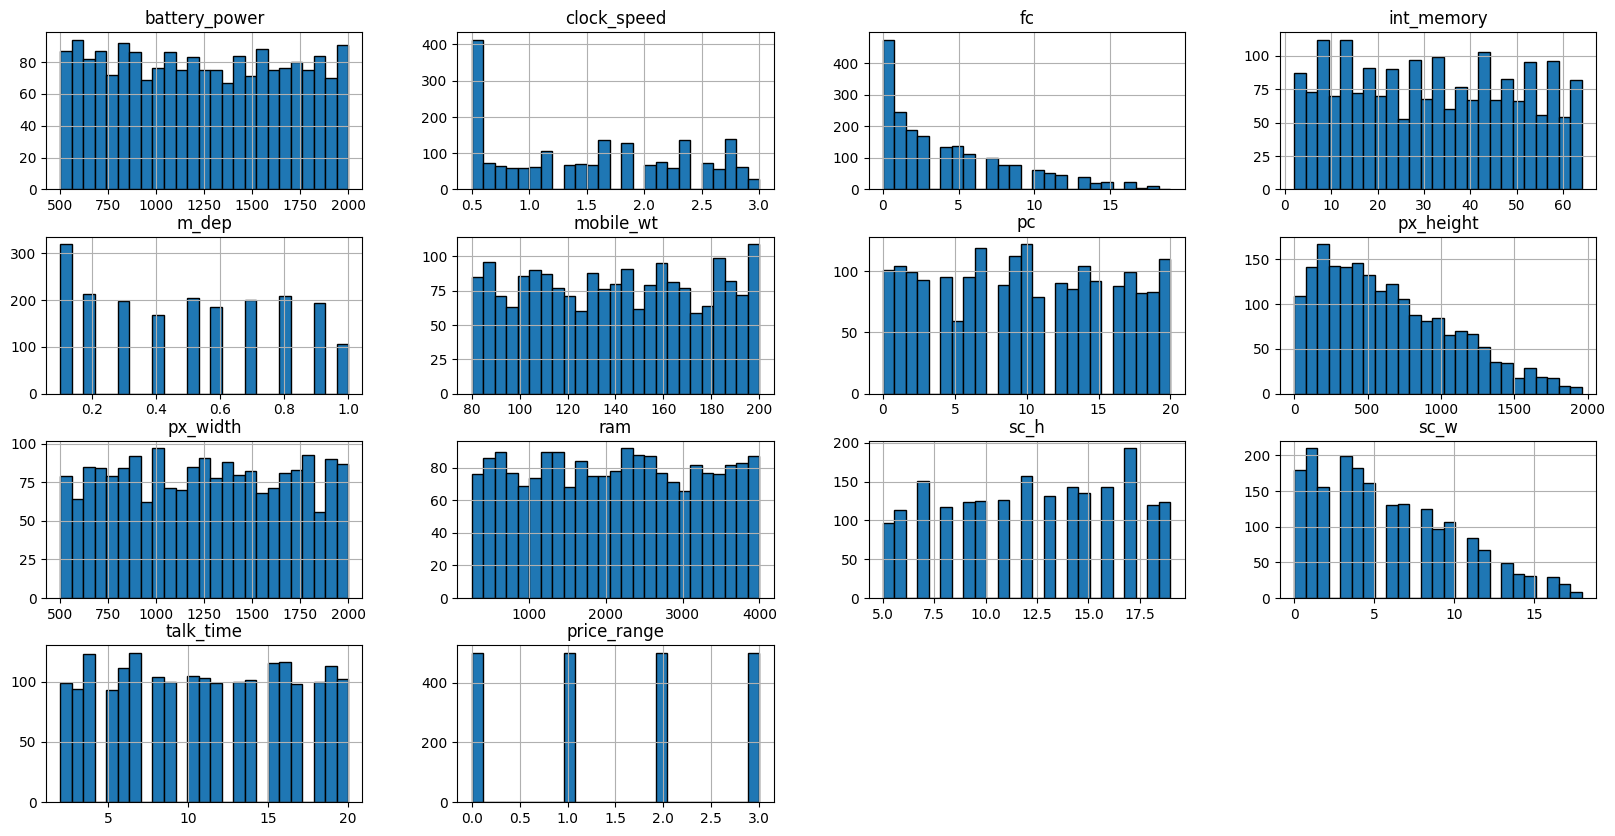

In [118]:
df.hist(figsize=(20, 10), bins=25, edgecolor='black')
plt.show()

Now that we've seen the histograms and correlation matrix, let's do statistical testing on the correlation of the features with the target variable price_range and see which features have significant predictive power.

In [119]:
anova_results = {}
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.drop('price_range')

for feature in numerical_features:
    groups = [df[df['price_range'] == category][feature] for category in df['price_range'].unique()]
    f_stat, p_value = f_oneway(*groups)
    anova_results[feature] = {"F-Statistic": f_stat, "P-Value": p_value}

anova_results_df = pd.DataFrame(anova_results).T.sort_values(by="P-Value")
print(anova_results_df)

               F-Statistic       P-Value
ram            3520.110824  0.000000e+00
battery_power    31.598158  5.948688e-20
px_width         22.620882  2.116911e-14
px_height        19.484842  1.886085e-12
mobile_wt         3.594318  1.311739e-02
int_memory        2.922996  3.277694e-02
sc_h              2.225984  8.324991e-02
sc_w              1.671000  1.712146e-01
talk_time         1.628811  1.806686e-01
m_dep             1.500682  2.124595e-01
pc                0.825446  4.797489e-01
fc                0.772182  5.095042e-01
clock_speed       0.493708  6.866752e-01


In [120]:
chi_square_results = {}
categorical_features = df.select_dtypes(include=['bool'])

for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['price_range'])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    chi_square_results[feature] = {"Chi-Square Statistic": chi2_stat, "P-Value": p_value}

chi_square_results_df = pd.DataFrame(chi_square_results).T.sort_values(by="P-Value")
print(chi_square_results_df)

              Chi-Square Statistic   P-Value
core_1                    8.743971  0.032896
touch_screen              3.880140  0.274701
core_5                    3.874999  0.275282
core_4                    3.197131  0.362219
four_g                    3.179880  0.364714
core_7                    2.355190  0.502030
core_3                    1.724282  0.631549
core_8                    1.540998  0.672841
core_2                    1.528900  0.675616
blue                      1.432143  0.698018
three_g                   1.373764  0.711696
dual_sim                  1.286464  0.732350
wifi                      0.856168  0.835991
core_6                    0.491280  0.920803


After running the tests for significance on the numerical and categorical features, we see that the features that are significant at a .10 significance value are:
* ram
* battery power
* pixel width
* pixel height
* mobile weight
* internal memory
* core_1 (n_cores = 1)

## Models

### Decision Tree

We'll use two models here, but first lets implement a decision tree.

In [121]:
#init train, test sets and decision tree classifier
significant_features = ['ram', 'battery_power', 'px_width', 'px_height', 'mobile_wt', 'int_memory', 'core_1']
X = df[significant_features]
y = df['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
dt_model = DecisionTreeClassifier(random_state=42)

#train model
dt_model.fit(X_train, y_train)

#predictions
y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print(report_dt)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       100
           1       0.84      0.82      0.83       100
           2       0.78      0.81      0.79       100
           3       0.92      0.88      0.90       100

    accuracy                           0.86       400
   macro avg       0.87      0.86      0.87       400
weighted avg       0.87      0.86      0.87       400



Next let's visualize our decision tree so we can see how our model is making it's predictions.

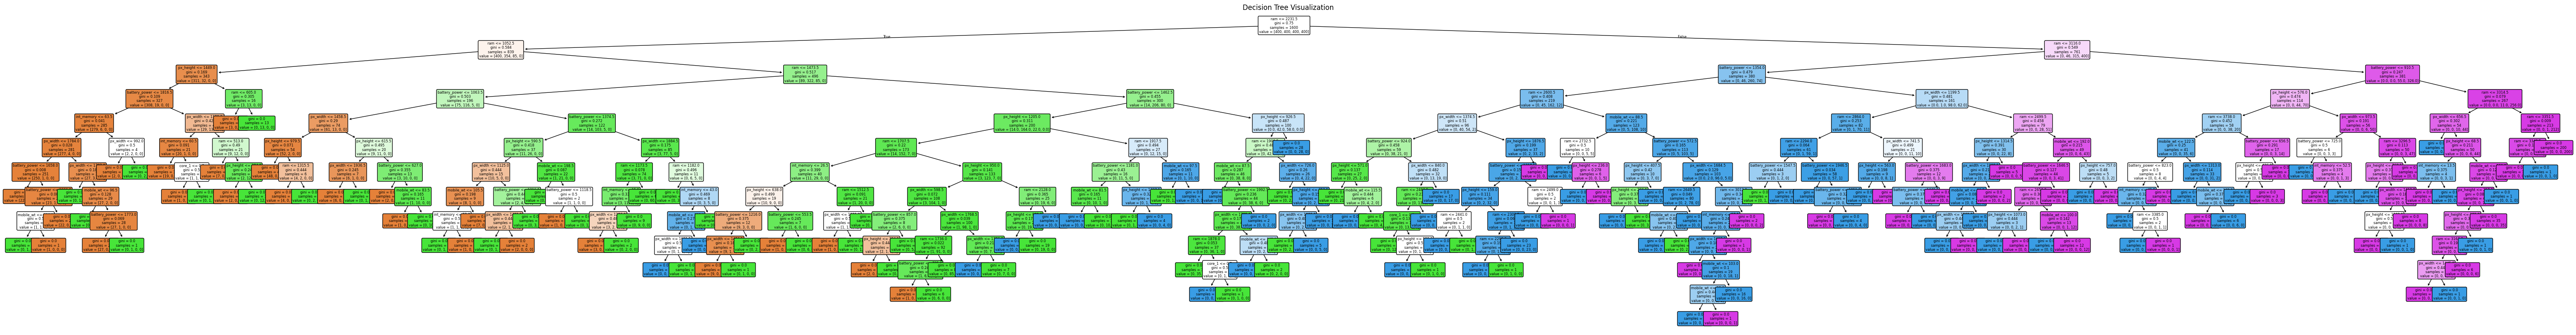

In [122]:
plt.figure(figsize=(80, 10))
plot_tree(
    dt_model,
    feature_names=significant_features,
    filled=True,
    rounded=True,
    fontsize=6
)
plt.title("Decision Tree Visualization")
plt.show()

If we remember from the correlation matrix, RAM was highly correlated with the price, and we can see in the visualization, the first split in the decision tree is whether the value for ram is <= 2231.5.

### Cross Validation

Now lets use cross validation. While we shouldn't be too worried about overfitting in our model due to our use of only 7 features, the dataset is on the smaller side and cross validation will give us reliable performance estimates.

In [123]:
cv_scores = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')

print("cross-validation scores:", cv_scores)
print("mean cross-validation accuracy:", cv_scores.mean())

cross-validation scores: [0.845  0.8625 0.8275 0.8475 0.85  ]
mean cross-validation accuracy: 0.8465


### Hyperparameter Tuning

Now we will use GridSearchCV to to handle the hyperparameter tuning to find the best hyperparameters for our model.

In [124]:
#define grid of candidates
param_grid_dt = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_model = DecisionTreeClassifier(random_state=42)

#implement GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

#create best model
best_params_dt = grid_search_dt.best_params_
best_dt_model = grid_search_dt.best_estimator_

y_pred_dt = best_dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
report = pd.DataFrame(report_dt).T

print("best params: ", best_params_dt),
print("best accuracy: ", accuracy_dt),
print(report)

best params:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
best accuracy:  0.8875
              precision  recall  f1-score   support
0              0.933333  0.9800  0.956098  100.0000
1              0.877778  0.7900  0.831579  100.0000
2              0.801887  0.8500  0.825243  100.0000
3              0.939394  0.9300  0.934673  100.0000
accuracy       0.887500  0.8875  0.887500    0.8875
macro avg      0.888098  0.8875  0.886898  400.0000
weighted avg   0.888098  0.8875  0.886898  400.0000


### Random Forest

For the our next model, we will be using Random Forests. We will be using the same statistically significant features. This seems like the logical next step since the random forests use ensemble learning (which will reduce potential overfitting caused by our smaller dataset) with multiple decision trees, and therefore should produce a more robust model.

In [125]:
#select statistically significant features and the target variable
significant_features = ['ram', 'battery_power', 'px_width', 'px_height', 'mobile_wt', 'int_memory', 'core_1']
X = df[significant_features]
y = df['price_range']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report).T

print(report_df)

              precision  recall  f1-score   support
0              0.951923  0.9900  0.970588  100.0000
1              0.944444  0.8500  0.894737  100.0000
2              0.862385  0.9400  0.899522  100.0000
3              0.979381  0.9500  0.964467  100.0000
accuracy       0.932500  0.9325  0.932500    0.9325
macro avg      0.934534  0.9325  0.932328  400.0000
weighted avg   0.934534  0.9325  0.932328  400.0000


Without any hyperparameter tuning, we can already see the random forest produces a significantly better accuracy, precision, and recall values.

We can again use cross validation, and should see a higher accuracy here as well.

In [126]:
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

print("cross-validation scores:", cv_scores)
print("mean cross-validation accuracy:", cv_scores.mean())

cross-validation scores: [0.905  0.9225 0.9225 0.9125 0.885 ]
mean cross-validation accuracy: 0.9095000000000001


## Results and Analysis

### Confusion Matrix

First lets use a confusion matrix to evaluate our random forest model and see what predictions it is having difficulty with.

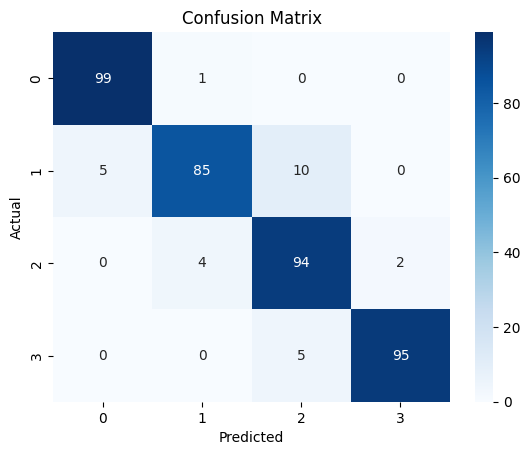

In [127]:
#init confusion matrix of y predictions and actual values
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

We can see an actual price range = 1 is the most difficult for our model to predict, since 10 times it incorrectly predicted price range to be 2, and 5 times it predicted a price range of 0.

### Feature Importance

Next let's visualize what the importance of each feature in making predictions.

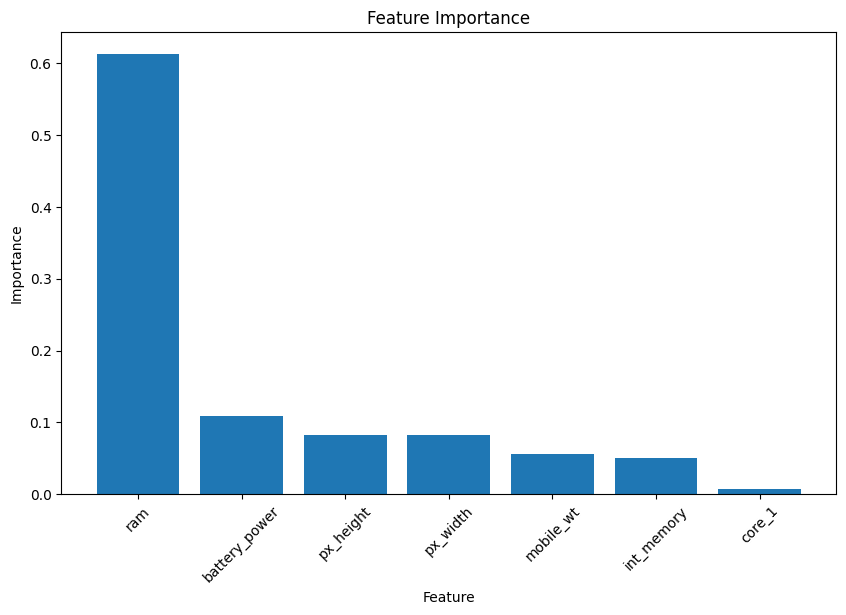

In [128]:
#use feature_importances_ in rf model
importance = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': significant_features, 'Importance': importance}).sort_values(by='Importance', ascending=False)

#create bar graph of feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

From the graphic we can see RAM has by far the most predictive power of price range in our model. While it is good we have a strong predictor, a lack of other strong predictors may cause confusion for our model since the RAM in a 2 price range phone could likely also be seen in some 1 price range phones and vice versa.

### Evaluation Metrics

First lets visually verify that our classes of price range are balanced.

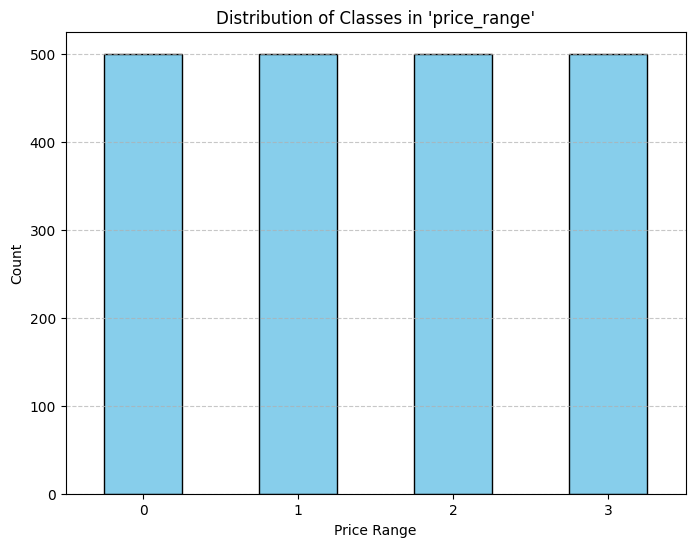

In [129]:
plt.figure(figsize=(8, 6))
df['price_range'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Classes in 'price_range'")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

We can see the classes our perfectly balanced, telling us that accuracy should be a reliable and consistent metric across classes. Now we will verify this and look closer at the initial evaluation metrics from our model, and the results for each class.

In [130]:
print(report_df)

              precision  recall  f1-score   support
0              0.951923  0.9900  0.970588  100.0000
1              0.944444  0.8500  0.894737  100.0000
2              0.862385  0.9400  0.899522  100.0000
3              0.979381  0.9500  0.964467  100.0000
accuracy       0.932500  0.9325  0.932500    0.9325
macro avg      0.934534  0.9325  0.932328  400.0000
weighted avg   0.934534  0.9325  0.932328  400.0000


As we can see visually in our confusion matrix, Class 1 has the lowest recall 85%, which indicates room for improvement in capturing all instances of this class.

If performance were to be refined, it would be best to try and improve classification for classes 1 and 2. Since the model has the most trouble distinguishing between them.

Overall, the metrics across classes are balanced with high accuracy, indicating we have created a strong model to fit the dataset.

## Discussion and Conclusion

Within the scope of the data, we learned the RAM in the mobile phone was by far the strongest predictor of price range of a mobile device. Additionally, we found the use of a random forest model created a robust and accurate model.

Within the scope of the class, we learned how a random forest model can improve on a decision tree model due to ensemble learning.

In the future, probably the best way to improve this model would be to gather more information about the phones so we can have more features used to predict the price range. More information could potentially improve the small classification issues our model had between classes 1 and 2. Additionally, we could explore interaction terms as well and see if there is potentially a strong predictor we are missing.